Original Motif: GAAGACACATGTAGT
Predicted Motifs: ['GCTGGTTAGGGGCGC', 'TTGTGCACAATGTCT', 'AATTTCCGATGGTGG', 'TCAGTGATAGAGAGC', 'GCCACCAGCGCTGAT', 'GACAGGTGCTCTTGT', 'GAAGTCACGAGGAGT', 'GAAGGCACGTCTAGC', 'GAAGTCACCTCTCGT', 'TAATCGCAGTTGAAT']
True Implanted Motifs: ['GATGAGACTTTTAGT', 'ATAGACACATATATT', 'GGAGACACACCTGGT', 'GAAGGAACATGTTTT', 'AAAGATACATTTTGT', 'GAGGACACATCAATT', 'GAAGTCACGAGGAGT', 'GAAGGCACGTCTAGC', 'GAAGTCACCTCTCGT', 'GAATACACAACTAGA']
Hamming Distance: 7.60
Accuracy: 30.00%
Recall: 30.00%


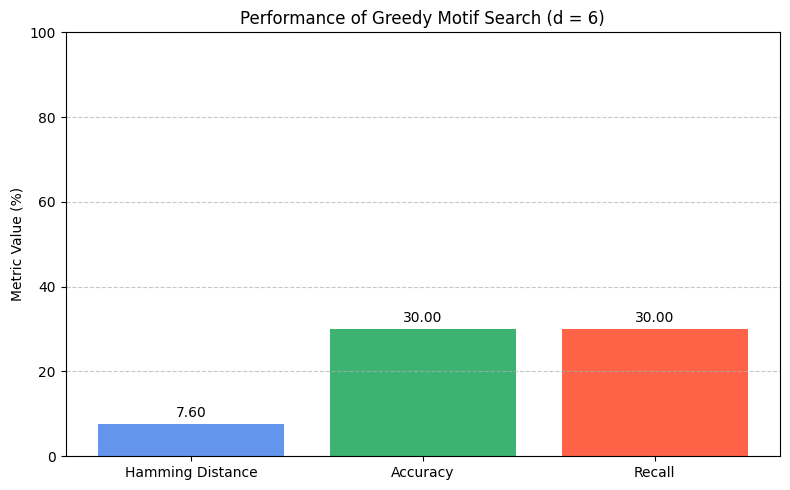

In [ ]:
import random
import numpy as np
from itertools import product

# Parameters
t = 10  # Number of DNA strings
N = 100  # Length of each DNA string
k = 15  # Motif length
d = 4   # Maximum mutations

# DNA bases
bases = ['A', 'C', 'G', 'T']

def generate_random_dna(length):
    return ''.join(random.choice(bases) for _ in range(length))

def mutate_motif(motif, d):
    motif = list(motif)
    positions = random.sample(range(len(motif)), d)
    for pos in positions:
        original = motif[pos]
        motif[pos] = random.choice([b for b in bases if b != original])
    return ''.join(motif)

# Generate DNA strings with implanted motifs
def generate_dataset(t, N, k, d):
    motif = generate_random_dna(k)
    sequences = []
    locations = []
    implanted_motifs = []

    for _ in range(t):
        rand_seq = generate_random_dna(N)
        mutated = mutate_motif(motif, d)
        pos = random.randint(0, N - k)
        rand_seq = rand_seq[:pos] + mutated + rand_seq[pos + k:]
        sequences.append(rand_seq)
        locations.append(pos)
        implanted_motifs.append(mutated)

    return sequences, motif, locations, implanted_motifs

# Count matrix
def count_matrix(motifs):
    counts = {b: [0]*k for b in bases}
    for motif in motifs:
        for i, base in enumerate(motif):
            counts[base][i] += 1
    return counts

# Profile matrix
def profile_matrix(motifs):
    counts = count_matrix(motifs)
    t = len(motifs)
    profile = {b: [count/t for count in counts[b]] for b in bases}
    return profile

# Consensus string
def consensus_string(motifs):
    counts = count_matrix(motifs)
    consensus = ''
    for i in range(k):
        max_count = 0
        frequent_base = ''
        for b in bases:
            if counts[b][i] > max_count:
                max_count = counts[b][i]
                frequent_base = b
        consensus += frequent_base
    return consensus

# Score
def score(motifs):
    consensus = consensus_string(motifs)
    return sum(hamming_distance(motif, consensus) for motif in motifs)

# Hamming Distance
def hamming_distance(s1, s2):
    return sum(1 for a, b in zip(s1, s2) if a != b)

# Most probable k-mer
def most_probable_kmer(text, profile):
    max_prob = -1
    best_kmer = text[0:k]
    for i in range(len(text) - k + 1):
        kmer = text[i:i + k]
        prob = 1
        for j, base in enumerate(kmer):
            prob *= profile[base][j]
        if prob > max_prob:
            max_prob = prob
            best_kmer = kmer
    return best_kmer

# Greedy Motif Search
def greedy_motif_search(dna):
    best_motifs = [seq[0:k] for seq in dna]
    first_seq = dna[0]
    for i in range(N - k + 1):
        motifs = [first_seq[i:i + k]]
        for j in range(1, t):
            profile = profile_matrix(motifs)
            next_motif = most_probable_kmer(dna[j], profile)
            motifs.append(next_motif)
        if score(motifs) < score(best_motifs):
            best_motifs = motifs
    return best_motifs

# Evaluation metrics
def calculate_metrics(predicted, actual):
    total = len(predicted)
    hd_sum = sum(hamming_distance(p, a) for p, a in zip(predicted, actual))
    correct = sum(1 for p, a in zip(predicted, actual) if hamming_distance(p, a) <= d)

    hamming = hd_sum / total
    accuracy = correct / total
    recall = correct / total  # since one motif per string = total positives

    return hamming, accuracy, recall

# Run experiment
dna, original_motif, positions, true_motifs = generate_dataset(t, N, k, d)
predicted_motifs = greedy_motif_search(dna)
hamming, accuracy, recall = calculate_metrics(predicted_motifs, true_motifs)

# Print Results
print("Original Motif:", original_motif)
print("Predicted Motifs:", predicted_motifs)
print("True Implanted Motifs:", true_motifs)
print(f"Hamming Distance: {hamming:.2f}")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")

import matplotlib.pyplot as plt

# Metrics from the run with d = 6
metrics = ['Hamming Distance', 'Accuracy', 'Recall']
values = [hamming, accuracy * 100, recall * 100]  # Convert accuracy/recall to percentages

# Bar chart visualization
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['cornflowerblue', 'mediumseagreen', 'tomato'])
plt.ylim(0, 100)
plt.title('Performance of Greedy Motif Search (d = 6)')
plt.ylabel('Metric Value (%)')

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Original Motif: TAAACAATACTGTAA
Predicted Motifs: ['GAAATCTAACCGTAC', 'GATTTGTTGCTGCCT', 'CATAGCGCCAGACTA', 'CGCAGGCGACGTGTG', 'TCGGGCAACCAACAG', 'GGTGCATACCTCAGC', 'GGTACGTTCCTCCAT', 'TGTTCCTTGCAGATT', 'GGTGTCAGCCCGCTC', 'CAGAGATTCCGGTTT']
True Implanted Motifs: ['TAACCGTACCCTGAA', 'TGAAGGCTACCGAGT', 'ACAAGCATGCTATCT', 'CTCTCAACAGTCTAT', 'AATGCAGTCCTCCTA', 'CAAATCAGTCCACAA', 'TAGTCCTTTCTTCAG', 'AAAGAAAGCGTGTTC', 'CATACGCCACCTCAA', 'GAAGGACTACCAGCA']
Hamming Distance: 10.80
Accuracy: 20.00%
Recall: 20.00%


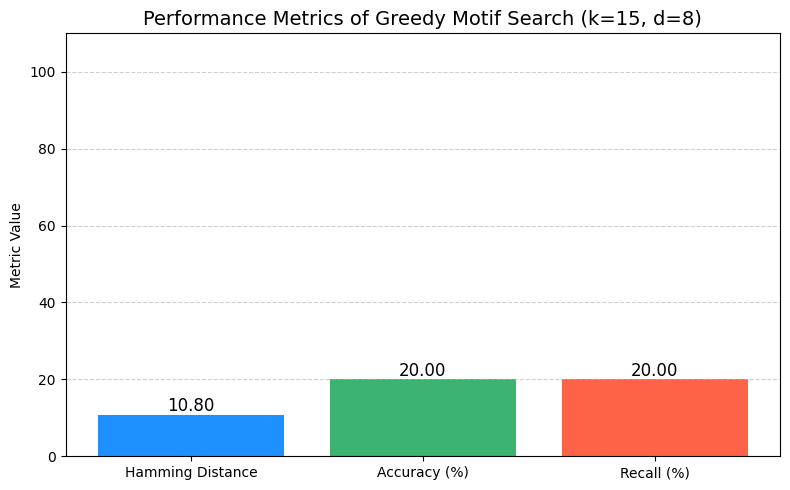

In [ ]:
import random
import numpy as np
from itertools import product

# Parameters
t = 10  # Number of DNA strings
N = 100  # Length of each DNA string
k = 15  # Motif length
d = 8   # Maximum mutations

# DNA bases
bases = ['A', 'C', 'G', 'T']

def generate_random_dna(length):
    return ''.join(random.choice(bases) for _ in range(length))

def mutate_motif(motif, d):
    motif = list(motif)
    positions = random.sample(range(len(motif)), d)
    for pos in positions:
        original = motif[pos]
        motif[pos] = random.choice([b for b in bases if b != original])
    return ''.join(motif)

# Generate DNA strings with implanted motifs
def generate_dataset(t, N, k, d):
    motif = generate_random_dna(k)
    sequences = []
    locations = []
    implanted_motifs = []

    for _ in range(t):
        rand_seq = generate_random_dna(N)
        mutated = mutate_motif(motif, d)
        pos = random.randint(0, N - k)
        rand_seq = rand_seq[:pos] + mutated + rand_seq[pos + k:]
        sequences.append(rand_seq)
        locations.append(pos)
        implanted_motifs.append(mutated)

    return sequences, motif, locations, implanted_motifs

# Count matrix
def count_matrix(motifs):
    counts = {b: [0]*k for b in bases}
    for motif in motifs:
        for i, base in enumerate(motif):
            counts[base][i] += 1
    return counts

# Profile matrix
def profile_matrix(motifs):
    counts = count_matrix(motifs)
    t = len(motifs)
    profile = {b: [count/t for count in counts[b]] for b in bases}
    return profile

# Consensus string
def consensus_string(motifs):
    counts = count_matrix(motifs)
    consensus = ''
    for i in range(k):
        max_count = 0
        frequent_base = ''
        for b in bases:
            if counts[b][i] > max_count:
                max_count = counts[b][i]
                frequent_base = b
        consensus += frequent_base
    return consensus

# Score
def score(motifs):
    consensus = consensus_string(motifs)
    return sum(hamming_distance(motif, consensus) for motif in motifs)

# Hamming Distance
def hamming_distance(s1, s2):
    return sum(1 for a, b in zip(s1, s2) if a != b)

# Most probable k-mer
def most_probable_kmer(text, profile):
    max_prob = -1
    best_kmer = text[0:k]
    for i in range(len(text) - k + 1):
        kmer = text[i:i + k]
        prob = 1
        for j, base in enumerate(kmer):
            prob *= profile[base][j]
        if prob > max_prob:
            max_prob = prob
            best_kmer = kmer
    return best_kmer

# Greedy Motif Search
def greedy_motif_search(dna):
    best_motifs = [seq[0:k] for seq in dna]
    first_seq = dna[0]
    for i in range(N - k + 1):
        motifs = [first_seq[i:i + k]]
        for j in range(1, t):
            profile = profile_matrix(motifs)
            next_motif = most_probable_kmer(dna[j], profile)
            motifs.append(next_motif)
        if score(motifs) < score(best_motifs):
            best_motifs = motifs
    return best_motifs

# Evaluation metrics
def calculate_metrics(predicted, actual):
    total = len(predicted)
    hd_sum = sum(hamming_distance(p, a) for p, a in zip(predicted, actual))
    correct = sum(1 for p, a in zip(predicted, actual) if hamming_distance(p, a) <= d)

    hamming = hd_sum / total
    accuracy = correct / total
    recall = correct / total  # since one motif per string = total positives

    return hamming, accuracy, recall

# Run experiment
dna, original_motif, positions, true_motifs = generate_dataset(t, N, k, d)
predicted_motifs = greedy_motif_search(dna)
hamming, accuracy, recall = calculate_metrics(predicted_motifs, true_motifs)

# Print Results
print("Original Motif:", original_motif)
print("Predicted Motifs:", predicted_motifs)
print("True Implanted Motifs:", true_motifs)
print(f"Hamming Distance: {hamming:.2f}")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")

import matplotlib.pyplot as plt
import seaborn as sns

# --- Bar Chart: Metrics ---
metrics = ['Hamming Distance', 'Accuracy (%)', 'Recall (%)']
values = [hamming, accuracy * 100, recall * 100]
colors = ['dodgerblue', 'mediumseagreen', 'tomato']

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=colors)

# Annotate
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.2f}', ha='center', fontsize=12)

plt.title(f'Performance Metrics of Greedy Motif Search (k={k}, d={d})', fontsize=14)
plt.ylabel("Metric Value")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Original Motif: TAAAAACGGAATGCA
Predicted Motifs: ['TAAAAACGCAATGCA', 'GTCTCTTTCAAGAAG', 'CGGGTAATGCAGCAC', 'TAAAAACGGAATGCG', 'GTATATGCCAAGGCG', 'TTAAAACGGAATGCA', 'TAAGAACGGAATGCA', 'TGACTATTTCGCATG', 'CAAAAACGGAATGCA', 'TAAAAACGGAATGAA']
True Implanted Motifs: ['TAAAAACGCAATGCA', 'TAAAAACGGAATGTA', 'TAAGAACGGAATGCA', 'TAAAAACGGAATGCG', 'TAAAAACGGACTGCA', 'TTAAAACGGAATGCA', 'TAAGAACGGAATGCA', 'TAAAAACGGAATGCT', 'CAAAAACGGAATGCA', 'TAAAAACGGAATGAA']
Hamming Distance: 4.60
Accuracy: 60.00%
Recall: 60.00%


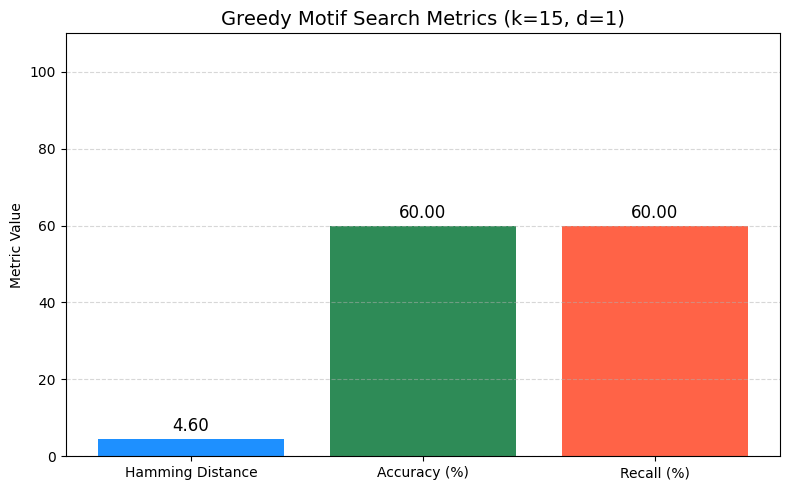

In [ ]:
import random
import numpy as np
from itertools import product

# Parameters
t = 10  # Number of DNA strings
N = 100  # Length of each DNA string
k = 15  # Motif length
d = 1  # Maximum mutations

# DNA bases
bases = ['A', 'C', 'G', 'T']

def generate_random_dna(length):
    return ''.join(random.choice(bases) for _ in range(length))

def mutate_motif(motif, d):
    motif = list(motif)
    positions = random.sample(range(len(motif)), d)
    for pos in positions:
        original = motif[pos]
        motif[pos] = random.choice([b for b in bases if b != original])
    return ''.join(motif)

# Generate DNA strings with implanted motifs
def generate_dataset(t, N, k, d):
    motif = generate_random_dna(k)
    sequences = []
    locations = []
    implanted_motifs = []

    for _ in range(t):
        rand_seq = generate_random_dna(N)
        mutated = mutate_motif(motif, d)
        pos = random.randint(0, N - k)
        rand_seq = rand_seq[:pos] + mutated + rand_seq[pos + k:]
        sequences.append(rand_seq)
        locations.append(pos)
        implanted_motifs.append(mutated)

    return sequences, motif, locations, implanted_motifs

# Count matrix
def count_matrix(motifs):
    counts = {b: [0]*k for b in bases}
    for motif in motifs:
        for i, base in enumerate(motif):
            counts[base][i] += 1
    return counts

# Profile matrix
def profile_matrix(motifs):
    counts = count_matrix(motifs)
    t = len(motifs)
    profile = {b: [count/t for count in counts[b]] for b in bases}
    return profile

# Consensus string
def consensus_string(motifs):
    counts = count_matrix(motifs)
    consensus = ''
    for i in range(k):
        max_count = 0
        frequent_base = ''
        for b in bases:
            if counts[b][i] > max_count:
                max_count = counts[b][i]
                frequent_base = b
        consensus += frequent_base
    return consensus

# Score
def score(motifs):
    consensus = consensus_string(motifs)
    return sum(hamming_distance(motif, consensus) for motif in motifs)

# Hamming Distance
def hamming_distance(s1, s2):
    return sum(1 for a, b in zip(s1, s2) if a != b)

# Most probable k-mer
def most_probable_kmer(text, profile):
    max_prob = -1
    best_kmer = text[0:k]
    for i in range(len(text) - k + 1):
        kmer = text[i:i + k]
        prob = 1
        for j, base in enumerate(kmer):
            prob *= profile[base][j]
        if prob > max_prob:
            max_prob = prob
            best_kmer = kmer
    return best_kmer

# Greedy Motif Search
def greedy_motif_search(dna):
    best_motifs = [seq[0:k] for seq in dna]
    first_seq = dna[0]
    for i in range(N - k + 1):
        motifs = [first_seq[i:i + k]]
        for j in range(1, t):
            profile = profile_matrix(motifs)
            next_motif = most_probable_kmer(dna[j], profile)
            motifs.append(next_motif)
        if score(motifs) < score(best_motifs):
            best_motifs = motifs
    return best_motifs

# Evaluation metrics
def calculate_metrics(predicted, actual):
    total = len(predicted)
    hd_sum = sum(hamming_distance(p, a) for p, a in zip(predicted, actual))
    correct = sum(1 for p, a in zip(predicted, actual) if hamming_distance(p, a) <= d)

    hamming = hd_sum / total
    accuracy = correct / total
    recall = correct / total  # since one motif per string = total positives

    return hamming, accuracy, recall

# Run experiment
dna, original_motif, positions, true_motifs = generate_dataset(t, N, k, d)
predicted_motifs = greedy_motif_search(dna)
hamming, accuracy, recall = calculate_metrics(predicted_motifs, true_motifs)

# Print Results
print("Original Motif:", original_motif)
print("Predicted Motifs:", predicted_motifs)
print("True Implanted Motifs:", true_motifs)
print(f"Hamming Distance: {hamming:.2f}")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Bar chart of metrics
metrics = ['Hamming Distance', 'Accuracy (%)', 'Recall (%)']
values = [hamming, accuracy * 100, recall * 100]
colors = ['dodgerblue', 'seagreen', 'tomato']

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

plt.title(f'Greedy Motif Search Metrics (k={k}, d={d})', fontsize=14)
plt.ylabel("Metric Value")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



Original Motif: AGATAAAGGATCCGA
Predicted Motifs: ['GTAAAACCCGCGTCA', 'GCGATAGTTGTTGTA', 'AGTTCAATGATTCTG', 'CTTGCACGAACACGC', 'CTAATCAGAAGGAGA', 'TCCGCCTCTTGTCGA', 'CTGACATGCAGATGA', 'ATTATATCATGGTTA', 'GCTTAAAGTAGTTGA', 'GTAAAAAGAGGGCGA']
True Implanted Motifs: ['ACGGGAAGGGTACCA', 'ATATACACCCAACGA', 'GGATACAAGGCACTA', 'GGACCATGGCACTGA', 'AGACATACATTCAGT', 'CACTAATGGATGGGG', 'AGTCAACGAAATCTA', 'TAACAAAGGCGATGA', 'GCTTAAAGTAGTTGA', 'GTAAAAAGAGGGCGA']
Hamming Distance: 8.90
Accuracy: 20.00%
Recall: 20.00%


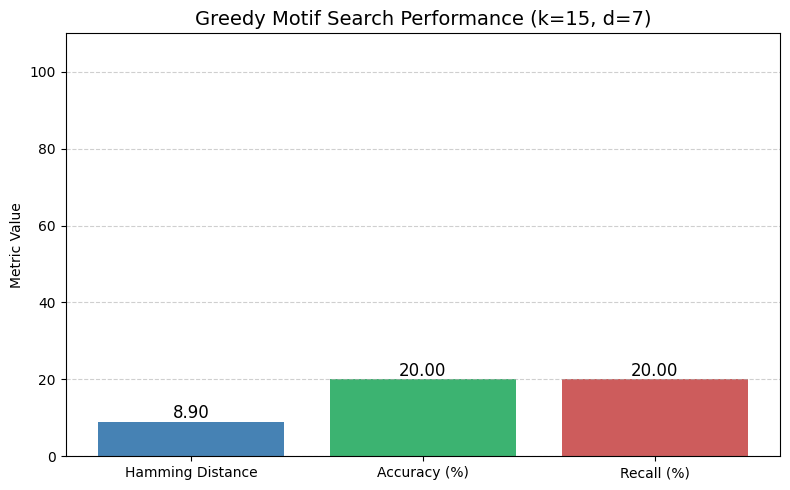

In [ ]:
import random
import numpy as np
from itertools import product

# Parameters
t = 10  # Number of DNA strings
N = 100  # Length of each DNA string
k = 15  # Motif length
d = 7   # Maximum mutations

# DNA bases
bases = ['A', 'C', 'G', 'T']

def generate_random_dna(length):
    return ''.join(random.choice(bases) for _ in range(length))

def mutate_motif(motif, d):
    motif = list(motif)
    positions = random.sample(range(len(motif)), d)
    for pos in positions:
        original = motif[pos]
        motif[pos] = random.choice([b for b in bases if b != original])
    return ''.join(motif)

# Generate DNA strings with implanted motifs
def generate_dataset(t, N, k, d):
    motif = generate_random_dna(k)
    sequences = []
    locations = []
    implanted_motifs = []

    for _ in range(t):
        rand_seq = generate_random_dna(N)
        mutated = mutate_motif(motif, d)
        pos = random.randint(0, N - k)
        rand_seq = rand_seq[:pos] + mutated + rand_seq[pos + k:]
        sequences.append(rand_seq)
        locations.append(pos)
        implanted_motifs.append(mutated)

    return sequences, motif, locations, implanted_motifs

# Count matrix
def count_matrix(motifs):
    counts = {b: [0]*k for b in bases}
    for motif in motifs:
        for i, base in enumerate(motif):
            counts[base][i] += 1
    return counts

# Profile matrix
def profile_matrix(motifs):
    counts = count_matrix(motifs)
    t = len(motifs)
    profile = {b: [count/t for count in counts[b]] for b in bases}
    return profile

# Consensus string
def consensus_string(motifs):
    counts = count_matrix(motifs)
    consensus = ''
    for i in range(k):
        max_count = 0
        frequent_base = ''
        for b in bases:
            if counts[b][i] > max_count:
                max_count = counts[b][i]
                frequent_base = b
        consensus += frequent_base
    return consensus

# Score
def score(motifs):
    consensus = consensus_string(motifs)
    return sum(hamming_distance(motif, consensus) for motif in motifs)

# Hamming Distance
def hamming_distance(s1, s2):
    return sum(1 for a, b in zip(s1, s2) if a != b)

# Most probable k-mer
def most_probable_kmer(text, profile):
    max_prob = -1
    best_kmer = text[0:k]
    for i in range(len(text) - k + 1):
        kmer = text[i:i + k]
        prob = 1
        for j, base in enumerate(kmer):
            prob *= profile[base][j]
        if prob > max_prob:
            max_prob = prob
            best_kmer = kmer
    return best_kmer

# Greedy Motif Search
def greedy_motif_search(dna):
    best_motifs = [seq[0:k] for seq in dna]
    first_seq = dna[0]
    for i in range(N - k + 1):
        motifs = [first_seq[i:i + k]]
        for j in range(1, t):
            profile = profile_matrix(motifs)
            next_motif = most_probable_kmer(dna[j], profile)
            motifs.append(next_motif)
        if score(motifs) < score(best_motifs):
            best_motifs = motifs
    return best_motifs

# Evaluation metrics
def calculate_metrics(predicted, actual):
    total = len(predicted)
    hd_sum = sum(hamming_distance(p, a) for p, a in zip(predicted, actual))
    correct = sum(1 for p, a in zip(predicted, actual) if hamming_distance(p, a) <= d)

    hamming = hd_sum / total
    accuracy = correct / total
    recall = correct / total  # since one motif per string = total positives

    return hamming, accuracy, recall

# Run experiment
dna, original_motif, positions, true_motifs = generate_dataset(t, N, k, d)
predicted_motifs = greedy_motif_search(dna)
hamming, accuracy, recall = calculate_metrics(predicted_motifs, true_motifs)

# Print Results
print("Original Motif:", original_motif)
print("Predicted Motifs:", predicted_motifs)
print("True Implanted Motifs:", true_motifs)
print(f"Hamming Distance: {hamming:.2f}")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")

import matplotlib.pyplot as plt

# Metrics and their corresponding values
metrics = ['Hamming Distance', 'Accuracy (%)', 'Recall (%)']
values = [hamming, accuracy * 100, recall * 100]

# Create bar chart
plt.figure(figsize=(8, 5))
colors = ['steelblue', 'mediumseagreen', 'indianred']
bars = plt.bar(metrics, values, color=colors)

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.2f}', ha='center', fontsize=12)

# Chart aesthetics
plt.title(f'Greedy Motif Search Performance (k={k}, d={d})', fontsize=14)
plt.ylabel('Metric Value')
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()



Original Motif: GATTTTAACACCTAA
Predicted Motifs: ['GCTCTTAACCTCTGT', 'TAGGGCGTCACCAGG', 'TTACTGGTAAGATAT', 'CCCTTCCGACACATA', 'GACTTTAGCCCCTAA', 'GATTTCAACATCTAG', 'TTGGGTGGCATAAGA', 'ATTTTGAACTATGGA', 'CATTTTCACAGCTAA', 'GATTTTAACAGCGAT']
True Implanted Motifs: ['GGTTTTAATACATAA', 'GATATTTAGACCTAA', 'GATATTAACACCCAT', 'CATTTTCACTCCTAA', 'GACTTTAGCCCCTAA', 'GATTTCAACATCTAG', 'AACATTAACACCTAA', 'GATATTAACACCTTG', 'CATTTTCACAGCTAA', 'GATTTTAACAGCGAT']
Hamming Distance: 6.00
Accuracy: 40.00%
Recall: 40.00%


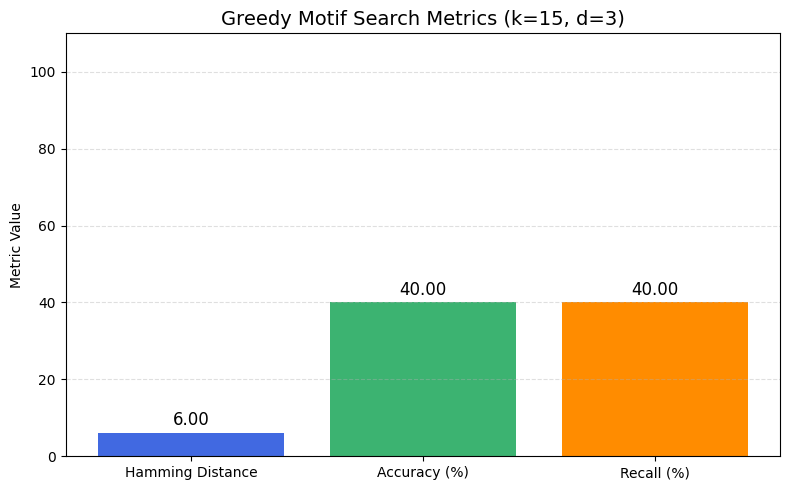

In [ ]:
import random
import numpy as np
from itertools import product

# Parameters
t = 10  # Number of DNA strings
N = 100  # Length of each DNA string
k = 15  # Motif length
d = 3   # Maximum mutations

# DNA bases
bases = ['A', 'C', 'G', 'T']

def generate_random_dna(length):
    return ''.join(random.choice(bases) for _ in range(length))

def mutate_motif(motif, d):
    motif = list(motif)
    positions = random.sample(range(len(motif)), d)
    for pos in positions:
        original = motif[pos]
        motif[pos] = random.choice([b for b in bases if b != original])
    return ''.join(motif)

# Generate DNA strings with implanted motifs
def generate_dataset(t, N, k, d):
    motif = generate_random_dna(k)
    sequences = []
    locations = []
    implanted_motifs = []

    for _ in range(t):
        rand_seq = generate_random_dna(N)
        mutated = mutate_motif(motif, d)
        pos = random.randint(0, N - k)
        rand_seq = rand_seq[:pos] + mutated + rand_seq[pos + k:]
        sequences.append(rand_seq)
        locations.append(pos)
        implanted_motifs.append(mutated)

    return sequences, motif, locations, implanted_motifs

# Count matrix
def count_matrix(motifs):
    counts = {b: [0]*k for b in bases}
    for motif in motifs:
        for i, base in enumerate(motif):
            counts[base][i] += 1
    return counts

# Profile matrix
def profile_matrix(motifs):
    counts = count_matrix(motifs)
    t = len(motifs)
    profile = {b: [count/t for count in counts[b]] for b in bases}
    return profile

# Consensus string
def consensus_string(motifs):
    counts = count_matrix(motifs)
    consensus = ''
    for i in range(k):
        max_count = 0
        frequent_base = ''
        for b in bases:
            if counts[b][i] > max_count:
                max_count = counts[b][i]
                frequent_base = b
        consensus += frequent_base
    return consensus

# Score
def score(motifs):
    consensus = consensus_string(motifs)
    return sum(hamming_distance(motif, consensus) for motif in motifs)

# Hamming Distance
def hamming_distance(s1, s2):
    return sum(1 for a, b in zip(s1, s2) if a != b)

# Most probable k-mer
def most_probable_kmer(text, profile):
    max_prob = -1
    best_kmer = text[0:k]
    for i in range(len(text) - k + 1):
        kmer = text[i:i + k]
        prob = 1
        for j, base in enumerate(kmer):
            prob *= profile[base][j]
        if prob > max_prob:
            max_prob = prob
            best_kmer = kmer
    return best_kmer

# Greedy Motif Search
def greedy_motif_search(dna):
    best_motifs = [seq[0:k] for seq in dna]
    first_seq = dna[0]
    for i in range(N - k + 1):
        motifs = [first_seq[i:i + k]]
        for j in range(1, t):
            profile = profile_matrix(motifs)
            next_motif = most_probable_kmer(dna[j], profile)
            motifs.append(next_motif)
        if score(motifs) < score(best_motifs):
            best_motifs = motifs
    return best_motifs

# Evaluation metrics
def calculate_metrics(predicted, actual):
    total = len(predicted)
    hd_sum = sum(hamming_distance(p, a) for p, a in zip(predicted, actual))
    correct = sum(1 for p, a in zip(predicted, actual) if hamming_distance(p, a) <= d)

    hamming = hd_sum / total
    accuracy = correct / total
    recall = correct / total  # since one motif per string = total positives

    return hamming, accuracy, recall

# Run experiment
dna, original_motif, positions, true_motifs = generate_dataset(t, N, k, d)
predicted_motifs = greedy_motif_search(dna)
hamming, accuracy, recall = calculate_metrics(predicted_motifs, true_motifs)

# Print Results
print("Original Motif:", original_motif)
print("Predicted Motifs:", predicted_motifs)
print("True Implanted Motifs:", true_motifs)
print(f"Hamming Distance: {hamming:.2f}")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")

import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of metrics
metrics = ['Hamming Distance', 'Accuracy (%)', 'Recall (%)']
values = [hamming, accuracy * 100, recall * 100]
colors = ['royalblue', 'mediumseagreen', 'darkorange']

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.2f}', ha='center', va='bottom', fontsize=12)

plt.title(f'Greedy Motif Search Metrics (k={k}, d={d})', fontsize=14)
plt.ylabel("Metric Value")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

